In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Load the Fashion MNIST dataset
(train_images,train_labels),( _,_ ) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images.reshape((60000,28,28,1))

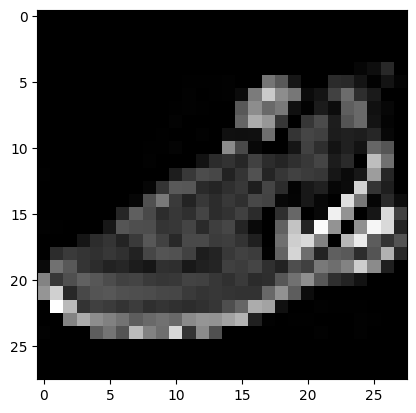

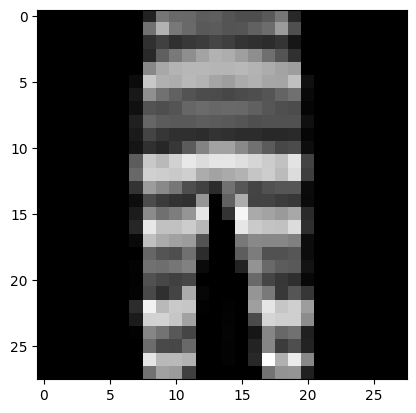

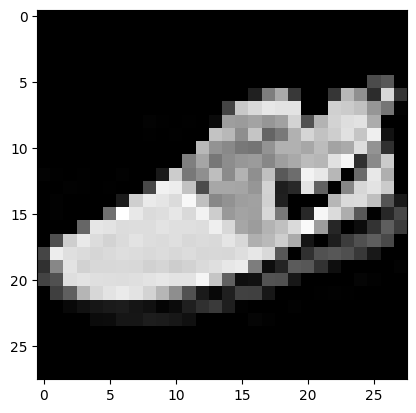

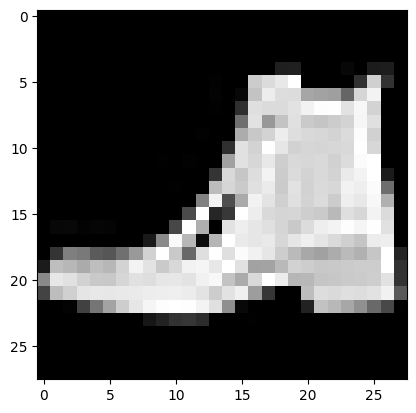

In [ ]:
for i in range(4):
    random_index = random.randint(0, len(train_images) )  # Fix the range to be inclusive
    plt.imshow(train_images[random_index].reshape(28,28), cmap='gray')  # Correct usage of cmap
    plt.show()

In [ ]:
def negative_images(img):
  neg = []
  for i in range(len(img)):
    temp=[]
    for j in range(len(img)):
      s=256-1-img[i][j]
      temp.append(s)
    neg.append(temp)
  return neg

In [ ]:
def show_images(original_image):
    negative_image = negative_images(original_image)

    # Plotting the original and negative images side by side
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(negative_image, cmap='gray')
    plt.title('Negative Image')

    plt.show()

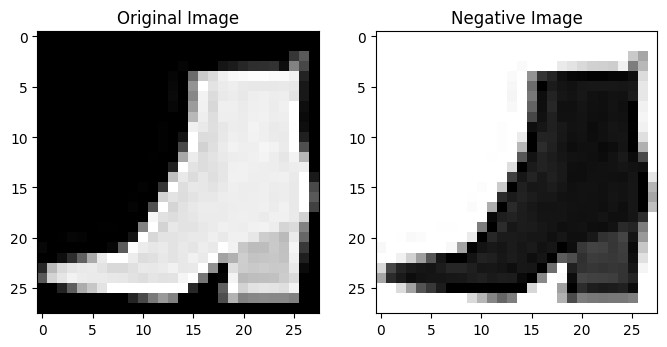

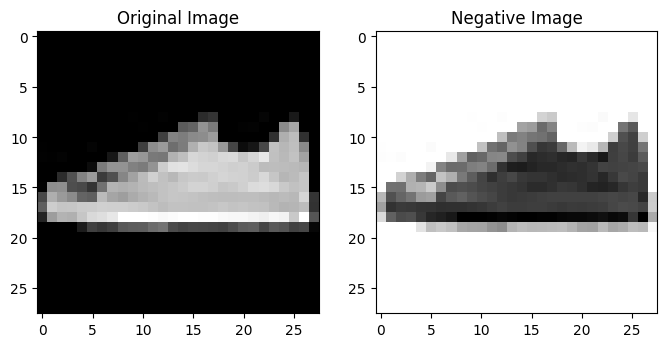

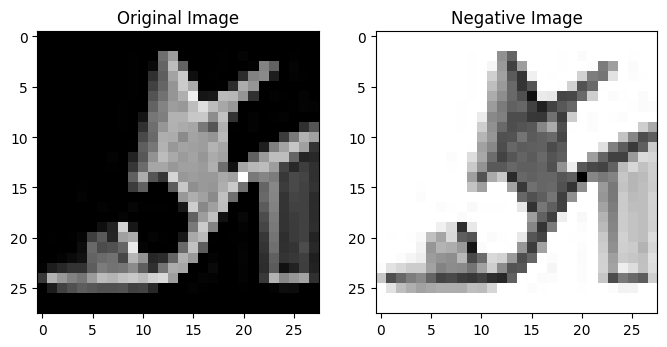

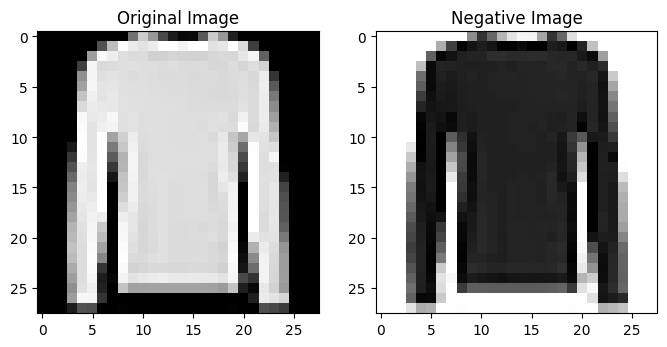

In [ ]:
for _ in range(4):
    random_index = random.randint(0, len(train_images) )  # Fix the range to be inclusive
    original_image = train_images[random_index]

    show_images(original_image)

In [ ]:
def thresholding(img, threshold=127):
    # Apply thresholding to the entire image
    now_image = np.where(img >= threshold, 255, 0)
    return now_image

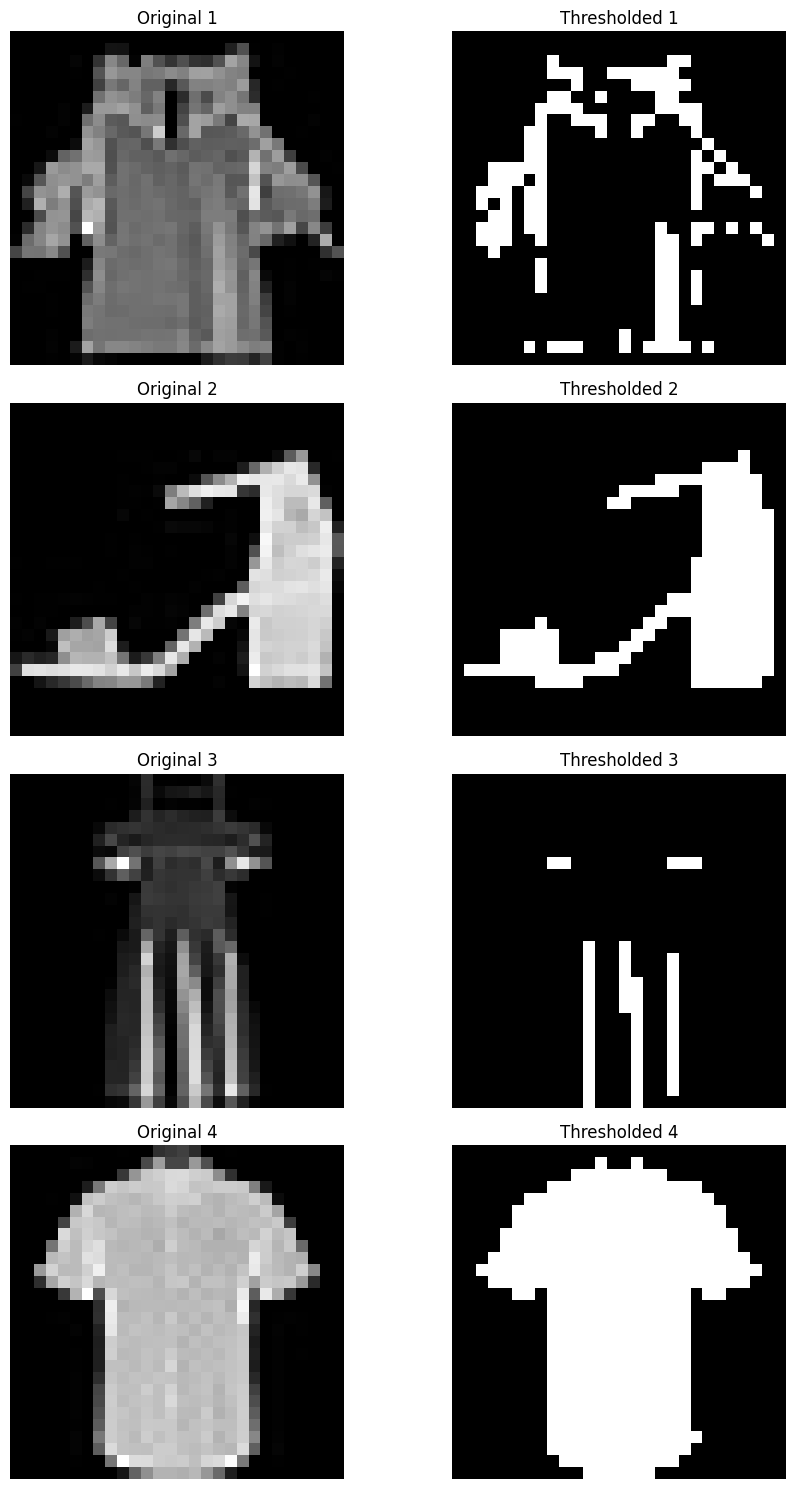

In [ ]:


# Create a figure with subplots
fig, axes = plt.subplots(4, 2, figsize=(10, 15))

for i in range(4):
    idx = random.randint(0, train_images.shape[0] - 1)  # Random index
    original_image = train_images[idx].squeeze()  # Remove singleton dimensions

    # Apply thresholding
    thresholded_image = thresholding(original_image)

    # Plot original and thresholded images
    ax_original = axes[i, 0]
    ax_thresholded = axes[i, 1]

    ax_original.imshow(original_image, cmap='gray')
    ax_original.set_title(f"Original {i+1}")
    ax_original.axis('off')

    ax_thresholded.imshow(thresholded_image, cmap='gray')
    ax_thresholded.set_title(f"Thresholded {i+1}")
    ax_thresholded.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
def gray_without_bg(img,a,b):
  neg = []
  for i in range(len(img)):
    temp=[]
    for j in range(len(img)):
      if img[i][j]>=a and img[i][j]<=b:
        s=255
      else:
        s=0
      temp.append(s)
    neg.append(temp)
  return neg

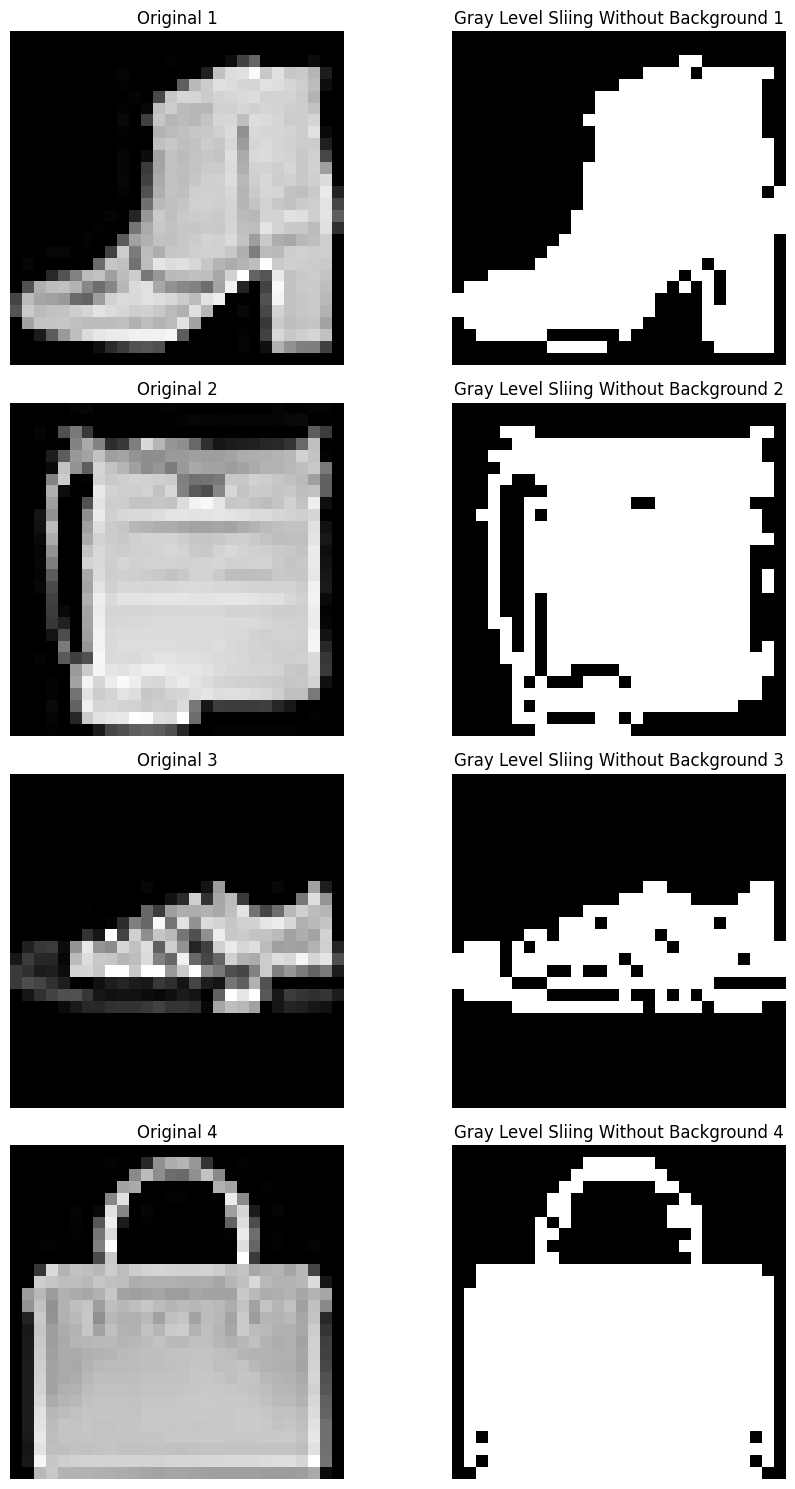

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(4, 2, figsize=(10, 15))

for i in range(4):
    idx = random.randint(0, train_images.shape[0] - 1)  # Random index
    original_image = train_images[idx].squeeze()  # Remove singleton dimensions

    # Apply thresholding
    thresholded_image = gray_without_bg(original_image,20,230)

    # Plot original and thresholded images
    ax_original = axes[i, 0]
    ax_thresholded = axes[i, 1]

    ax_original.imshow(original_image, cmap='gray')
    ax_original.set_title(f"Original {i+1}")
    ax_original.axis('off')

    ax_thresholded.imshow(thresholded_image, cmap='gray')
    ax_thresholded.set_title(f"Gray Level Sliing Without Background {i+1}")
    ax_thresholded.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
def gray_with_bg(img,a,b):
  neg=[]
  for i in range(len(img)):
    temp=[]
    for j in range(len(img)):
      if img[i][j]>=a and img[i][j]<=b:
        s= img[i][j]
      else:
        s=0
      temp.append(s)
      neg.append(temp)
    return np.array(neg)


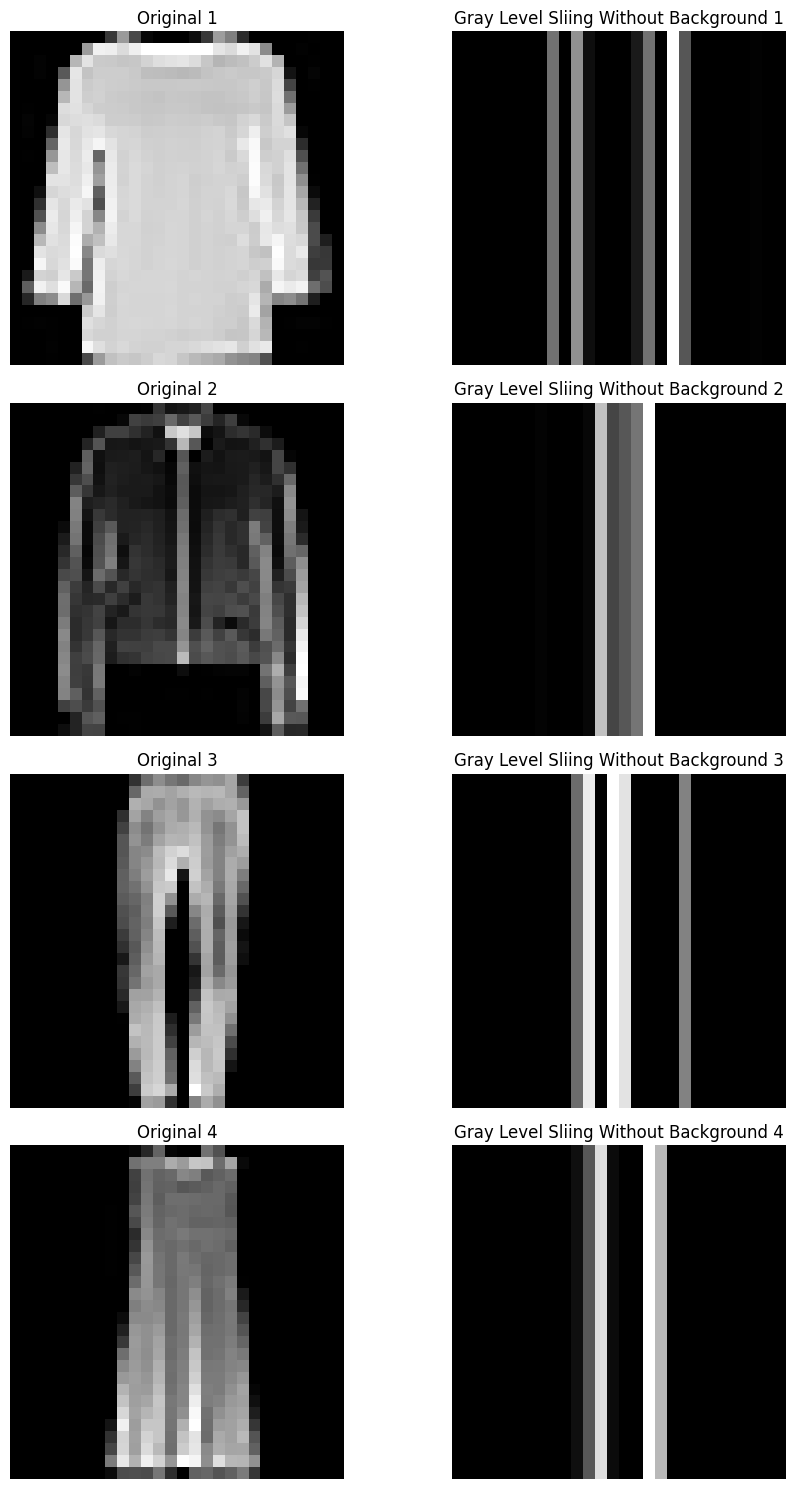

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(4, 2, figsize=(10, 15))

for i in range(4):
    idx = random.randint(0, train_images.shape[0] - 1)  # Random index
    original_image = train_images[idx].squeeze()  # Remove singleton dimensions

    # Apply thresholding
    thresholded_image = gray_with_bg(original_image,0,130)

    # Plot original and thresholded images
    ax_original = axes[i, 0]
    ax_thresholded = axes[i, 1]

    ax_original.imshow(original_image, cmap='gray')
    ax_original.set_title(f"Original {i+1}")
    ax_original.axis('off')

    ax_thresholded.imshow(thresholded_image, cmap='gray')
    ax_thresholded.set_title(f"Gray Level Sliing Without Background {i+1}")
    ax_thresholded.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import cv2 as cv
messi = cv.imread('/content/messi.jpg')
gray = cv.cvtColor(messi, cv.COLOR_BGR2GRAY)  # Convert to grayscale

True

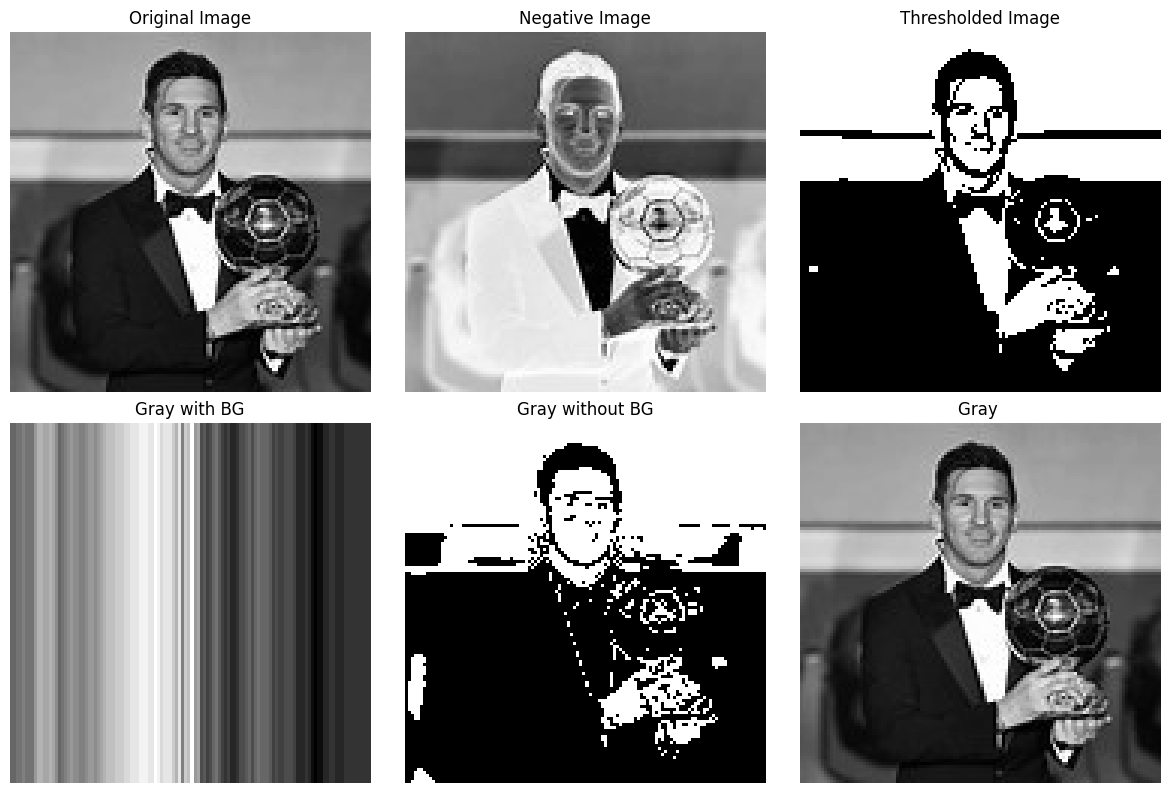

In [ ]:
neg_img = negative_images(gray)
thresh_img = thresholding(gray)
gray_bg_img = gray_with_bg(gray, 10, 200)
gray_no_bg_img = gray_without_bg(gray, 100, 200)

# Plot the images
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(neg_img, cmap='gray')
plt.title('Negative Image')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(thresh_img, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(gray_bg_img, cmap='gray')
plt.title('Gray with BG')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(gray_no_bg_img, cmap='gray')
plt.title('Gray without BG')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(gray, cmap='gray')
plt.title('Gray ')
plt.axis('off')

plt.tight_layout()
plt.show()